# CHURN PROJECT FOR A TELECOMMUNICATION COMPANY

## Predict behavior to retain customers.
### Analyze all relevant customer data and develop focused customer retention programs.

# 1. Import the dependencies

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

# 2. Data loading and understanding

In [196]:
## Load csv data via pandas
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [197]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [198]:
df.shape

(7043, 21)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


OBSERVATION: The dataset has 7,043 rows and 21 columns with no missing values. Most columns are categorical (object type), but TotalCharges should be converted to numeric, and Churn may need encoding for modeling. Further preprocessing and exploration are required for analysis.

In [200]:
# create a copy of this data to maintain data integrity/preserve original data
df_copy = df.copy()

In [201]:
# Droping customerID as this is not required for modeling 
df_copy = df_copy.drop(labels='customerID', axis=1)
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [202]:
# print the unique values in all the columns allowing us to identfy the distribution of unique value in the data
for cols in df_copy.columns:
    print(cols, df_copy[cols].unique())
    print('-'*50)
    

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [203]:
# As seen from above, we have some object datatype e.g `Totalcharges` represented in the data, hence we have to convert them to float or integars
# df_copy= df_copy['TotalCharges'].astype(float)

OBSERVERSATION: It is observed that they're some empty rows in the column but are not represent as a NAN.


In [204]:
df_copy[df_copy['TotalCharges']==" "] # this return all the rows involved with TotalCharges that are empty string

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [205]:
len(df_copy[df_copy['TotalCharges']==" "] )

11

As seen there is a reason why some rows of the TotalCharges are empty this is because TotalCharges is a product of the tenure and MonthlyCharges, and if the tenure is 0, it automatically makes the TotalCharges empty, which is a valid reason

Now, instead of dropping it I input the "0.0" in it and convert it to a float inorder to correspond with the remaining values


In [206]:
df_copy['TotalCharges'] = df_copy['TotalCharges'].replace(" ", "0.00")


In [207]:
len(df_copy[df_copy['TotalCharges']==" "] )


0

In [208]:
df_copy["TotalCharges"]=df_copy['TotalCharges'].astype(float)
df_copy['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


### Checking the class distribution of target column


In [209]:
# this is done to check the imbalance between the two classes present in the target variable
df_copy['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

OBSERVATION: It can be observed that the ratio between the two classes is dispproportinate, roughly 1:5; which will affect the model prediction


# Exploratory Data Analysis (EDA)

In [210]:
df_copy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [211]:
df_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Numerical Analysis**

Understanding the numerical distribution of the data

In [212]:
def plot_Histogram(data, column_name):
    plt.figure(figsize=(5,3))
    sns.histplot(data[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    
    # calculate the mean and median values for the columns plotted
    col_mean = data[column_name].mean()
    col_median = data[column_name].median()
    
    # add vertical line for mean and median
    plt.axvline(col_mean, color='blue', linestyle='--', label="Mean")
    plt.axvline(col_median, color='red', linestyle='-', label="Median")
    
    plt.legend()
    plt.show()
    

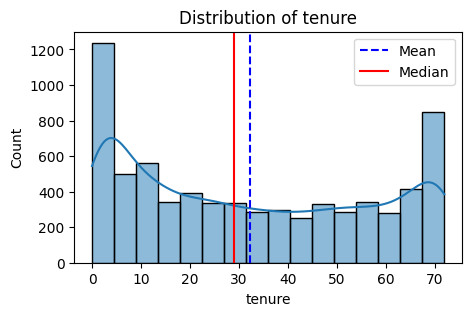

In [213]:
plot_Histogram(df_copy, 'tenure')

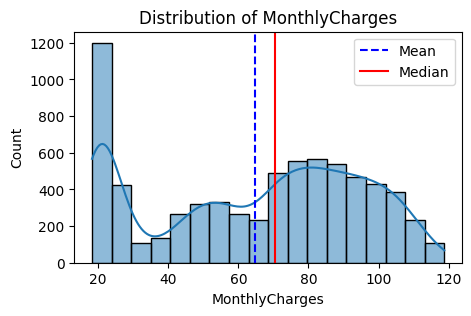

In [214]:
plot_Histogram(df_copy, 'MonthlyCharges')

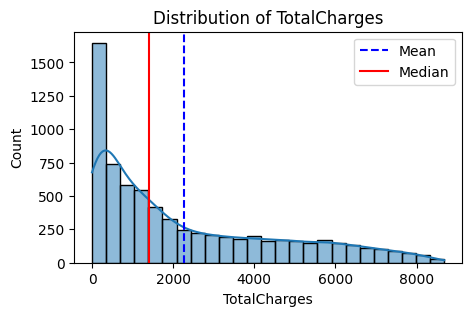

In [215]:
plot_Histogram(df_copy, "TotalCharges")

OBSERVAATION: From the `tenure`, `MonthlyCharges` and `TotalCharges` are 32.371149, 64.761692 and 2279.734304 respectively and that the `TotalCharges` is right skewed

**Boxplot for numerical features**

In [216]:
def plot_boxplot(data, column_name):
    plt.figure(figsize=(4,6))
    sns.boxplot( df_copy[column_name])
    plt.title(f'Boxplot  of {column_name}')
    plt.ylabel(column_name)
    plt.show()

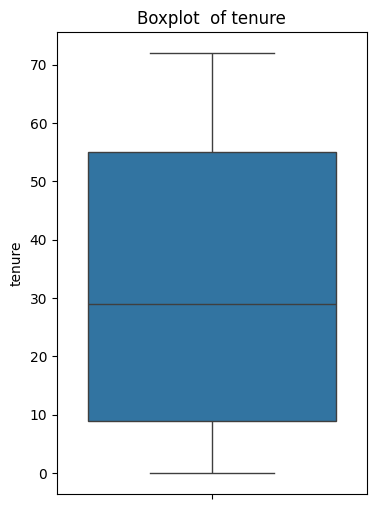

In [217]:
plot_boxplot(df_copy, 'tenure')

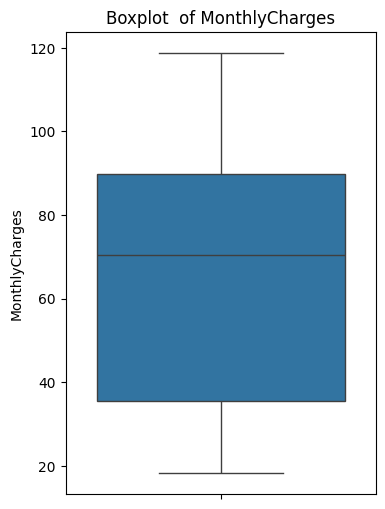

In [218]:
plot_boxplot(df_copy, 'MonthlyCharges')

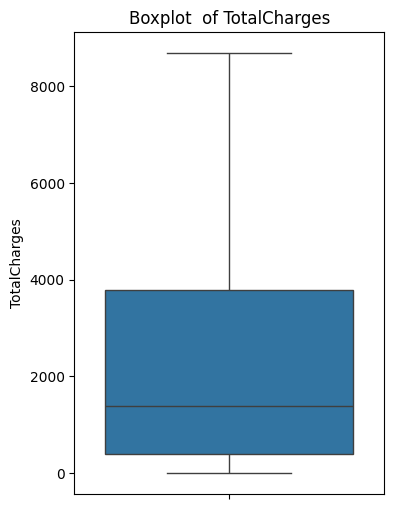

In [219]:
plot_boxplot(df_copy, 'TotalCharges')

OBSERVATION: 

`MonthlyCharges`:

- The bottom of the box (Q1/25th percentile) is around 35-40 units
- The median is closer to the top of the box, indicating a positively skewed distribution
- This suggests there are more customers paying lower monthly charges, with fewer at the higher end

`TotalCharges`:

- The median is closer to the bottom of the box, indicating a negatively skewed distribution
- This means there are more customers with lower total charges compared to higher total charges

`Tenure`:

- The median is around 50 units
- The moderate spread from 0 to 70 units
- The symmetric nature of the plot indicates a balanced distribution without significant skewness

**Correlation heatmap for numerical coloumns**

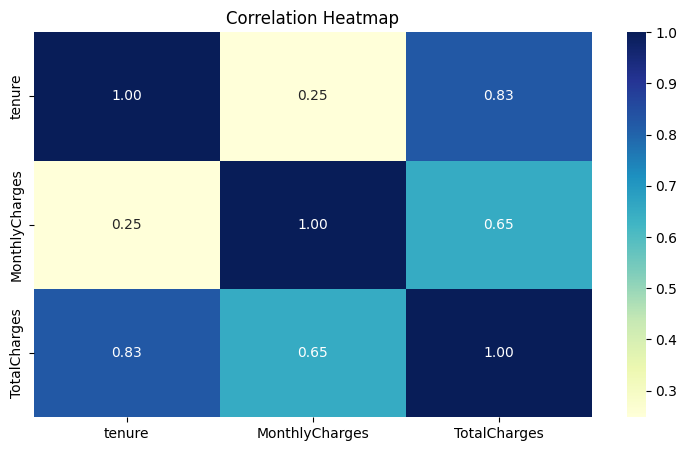

In [220]:
plt.figure(figsize=(9,5))
sns.heatmap(df_copy[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Categorical features analsysis

In [221]:
df_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [222]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Categorical column are those column having the datatype of object while numerical features are columns with datatype of int and float


In [223]:
df_copy.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [224]:
# create a list of categorical columns
object_columns = df_copy.select_dtypes(include=['object']).columns.tolist()
# we have to add `seniorCitizens`` to the list cause it's still a categorial column even though the data type is an integar
object_columns = ['SeniorCitizen']+ object_columns 
object_columns

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

Count plot for categorical columns


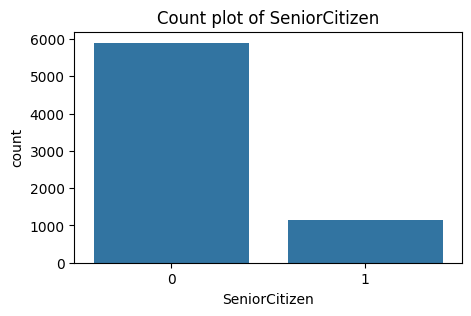

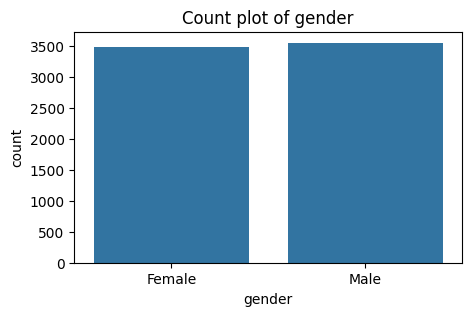

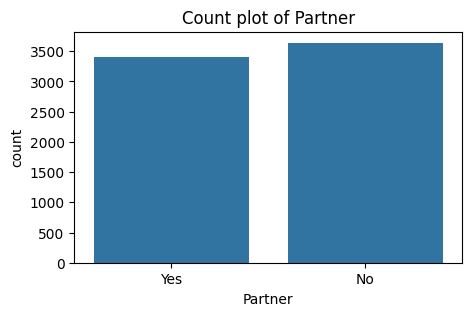

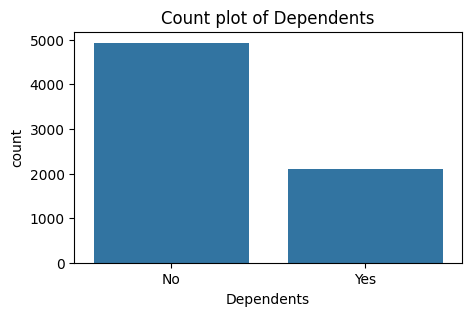

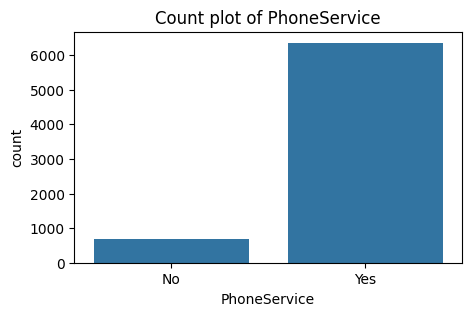

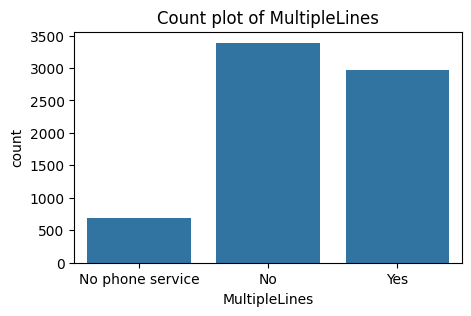

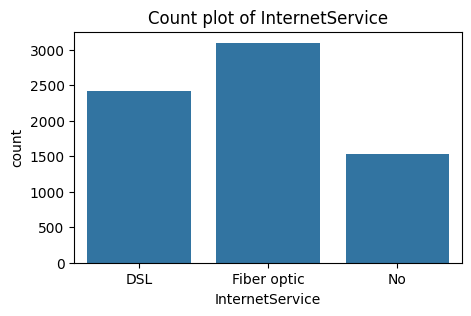

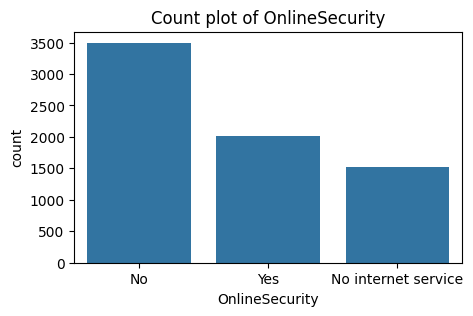

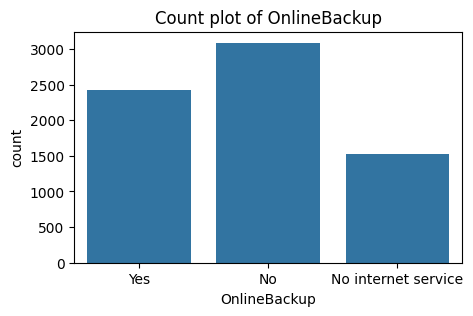

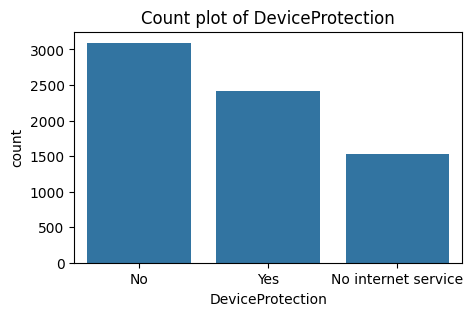

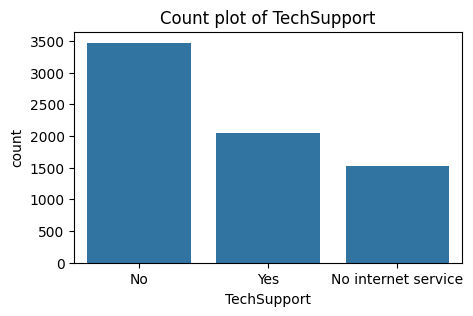

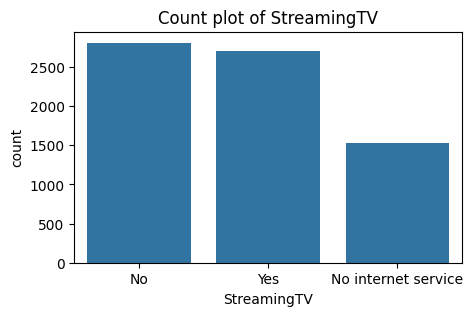

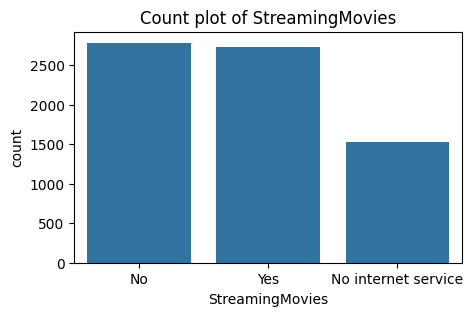

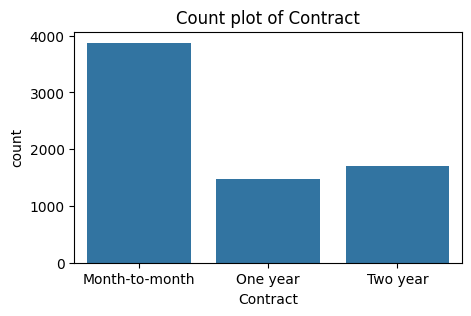

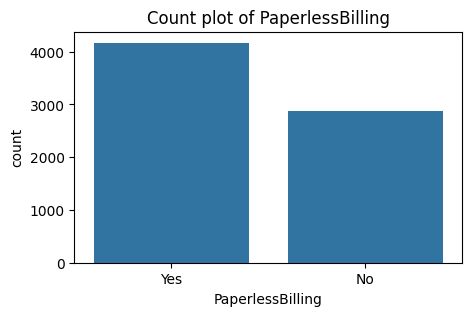

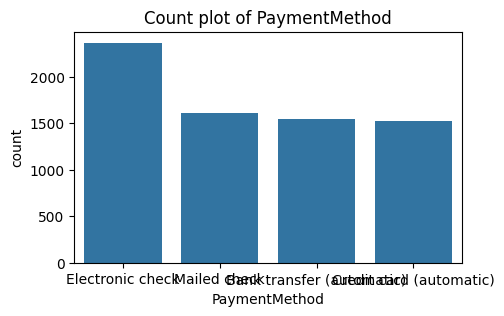

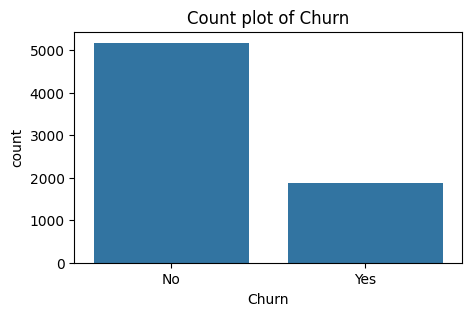

In [225]:
for label in object_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=df_copy[label])
    plt.title(f'Count plot of {label}')
    plt.show()

4. Data preprocessing

In [226]:

df_copy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


label encoding of target column

In [227]:
df_copy['Churn'] = df_copy['Churn'].replace({'Yes':1, 'No':0})
df_copy['Churn'].value_counts()

/var/folders/cf/7m8b1h4n60n0jq9jrrfltnd00000gn/T/ipykernel_7786/4227625887.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Churn'] = df_copy['Churn'].replace({'Yes':1, 'No':0})


Churn
0    5174
1    1869
Name: count, dtype: int64

In [228]:
# columns to encode (excluding the `SeniorCitizen` cause it is an integar)
object_columns = df_copy.select_dtypes(include=['object']).columns.tolist()
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [229]:
# Now we encocode the categorical features and save the encoder  in a file for future encoding of data

# initialise a dictionary to save the encoders
encoders = {}

# Apply label encoding and store the encoders
for column in object_columns:
    
    #instantiate the encoder
    label_encoder = LabelEncoder()
    
    # fit the encoder to the model  and replace column value with the encode value
    df_copy[column] = label_encoder.fit_transform(df_copy[column])
    
    #save the encoder to the variable and store in pickle
    encoders[column] = label_encoder
    
    # save the encoders to a pickle file
    with open('../data/encoders/churn_encoders.pkl', 'wb')  as f:
        pickle.dump(encoders, f)

In [230]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [231]:
df_copy.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
